# Importancia de características

La **importancia de una característica** $k$ en un árbol $T$ se define como la suma de las ganancias (reducciones de coste) obtenidas en los nodos internos que la usan:
$$R_k(T)=\sum_jG_j\mathbb{I}(v_j=k)$$
donde $v_j=k$ si el nodo $j$ usa la variable $k$. En el caso de un ensamble de $M$ árboles, esta definición se extiende mediante promediado:
$$R_k=\frac{1}{M}\sum_{m=1}^MR_k(T_m)$$
Las importancias de las características pueden normalizarse con respecto a la máxima ($100\%$). 

**Ejemplo:** importancias para clasificador (de dígitos escogidos en) MNIST

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.data = mnist.data.astype(np.float32).to_numpy()
mnist.target = mnist.target.astype(np.uint8).to_numpy()

In [2]:
from sklearn.ensemble import RandomForestClassifier

X = mnist["data"]
y = mnist["target"]
mask = (y == 6) | (y == 9) # <<< escoge dígitos
X_mask = X[mask, :]
y_mask = y[mask]
print(X_mask.shape, y_mask.shape)
clf = RandomForestClassifier(n_estimators=20, random_state=42)
clf.fit(X_mask, y_mask)
image = clf.feature_importances_.reshape(28, 28)

(13834, 784) (13834,)


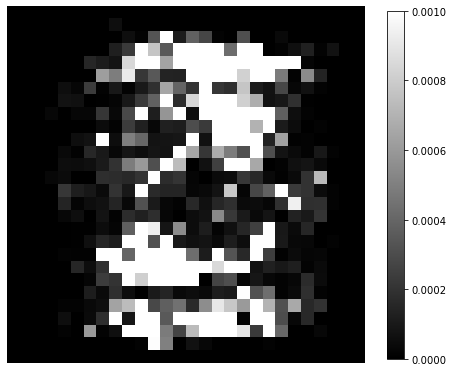

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.set(aspect='equal'); ax.axis('off')
plt.imshow(image, cmap='gray', interpolation="none", vmin=0.0, vmax=0.001)
plt.colorbar(ax=ax, shrink=0.8);